# Person and face detection

Using object, person and face detectors in OpenDR is also very straighfoward.


We start by the well known imports as before:

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import cv2
from utils import VideoReader

We start by using the SSD detector for person detection:

In [4]:
from opendr.perception.object_detection_2d import SingleShotDetectorLearner

Object detection also provides supplementary functions for plotting:

In [5]:
from opendr.perception.object_detection_2d.utils import draw_bounding_boxes

As before we can initialize the detector and directly use it:

In [6]:
ssd = SingleShotDetectorLearner(device='cuda')
ssd.download(".", mode="pretrained")
ssd.load("ssd_default_person", verbose=True)

Model name: ssd_default_person --> ssd_default_person/ssd_default_person.json
Loaded parameters and metadata.


True

Then we can directly use the model for person detection as before:

In [7]:
image_provider = VideoReader(0)
for counter, img in enumerate(image_provider):
    
    # Performance inference
    boxes = ssd.infer(img)
    
    # Visualize the results
    draw_bounding_boxes(img, boxes, class_names=ssd.classes)
    
    cv2.imshow('Result', img)
    if cv2.waitKey(1) == ord('q'):
        break
    
cv2.destroyAllWindows()
image_provider.close()

/home/nick/Desktop/demos/venv/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3256: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/nick/Desktop/demos/venv/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


If we want to perform face recognition we just need to import a face detector and use it:

In [8]:
from opendr.perception.object_detection_2d import RetinaFaceLearner

In [9]:
learner = RetinaFaceLearner(backbone='resnet', device='cuda')
learner.download(".", mode="pretrained")
learner.load("./retinaface_resnet")

Loading model from path:  ./retinaface_resnet/retinaface_resnet


RuntimeError: simple_bind error. Arguments:
data: (1, 3, 640, 640)
Traceback (most recent call last):
  File "../src/storage/storage.cc", line 119
MXNetError: Compile with USE_CUDA=1 to enable GPU usage

In [10]:
image_provider = VideoReader(0)
for counter, img in enumerate(image_provider):
    boxes = learner.infer(img)

    draw_bounding_boxes(img, boxes, class_names=learner.classes)
    
    cv2.imshow('Result', img)
    if cv2.waitKey(1) == ord('q'):
        break
    
cv2.destroyAllWindows()
image_provider.close()

AttributeError: 'NoneType' object has no attribute 'nms_threshold'

We can also grab a face image and then use it for face recognition (more on this in a few moments):

In [12]:
image_provider = iter(VideoReader(0))
img = next(image_provider)
image_provider.close()

[ WARN:0] global /tmp/pip-req-build-ms668fyv/opencv/modules/videoio/src/cap_v4l.cpp (893) open VIDEOIO(V4L2:/dev/video0): can't open camera by index


OSError: Video 0 cannot be opened

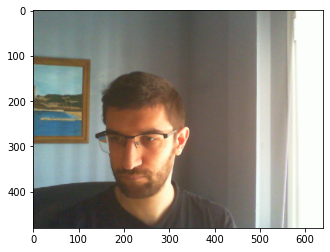

In [13]:
plt.imshow(img[:, :, [2, 1, 0]])

Then we can crop the face image. To this end, we need to convert the bounding box into a format that can be directly used for cropping. Hopefully, OpenDR has a tool for this!

In [15]:
from opendr.perception.object_detection_2d.datasets.transforms import BoundingBoxListToNumpyArray
# Find the face bbox
boxes = learner.infer(img, threshold=0.6)

# Get the coordinates and crop the face
bbox = BoundingBoxListToNumpyArray()(boxes)[0][:4].astype(np.int)
face_img = img[bbox[1]:bbox[3],bbox[0]:bbox[2], :]

AttributeError: 'NoneType' object has no attribute 'nms_threshold'

In [16]:
plt.imshow(face_img[:, :, [2, 1, 0]])

NameError: name 'face_img' is not defined

Save the image in order to use it for face recognition:

Grab a face image and save it for later

In [17]:
!mkdir -p persons/nick
cv2.imwrite('persons/nick/1.jpg', face_img)

NameError: name 'face_img' is not defined